### Student Information
Name:白宗翰

Student ID:110048138

GitHub ID:HummerQAQ

Kaggle name:HummerQAQ

Kaggle private scoreboard snapshot:
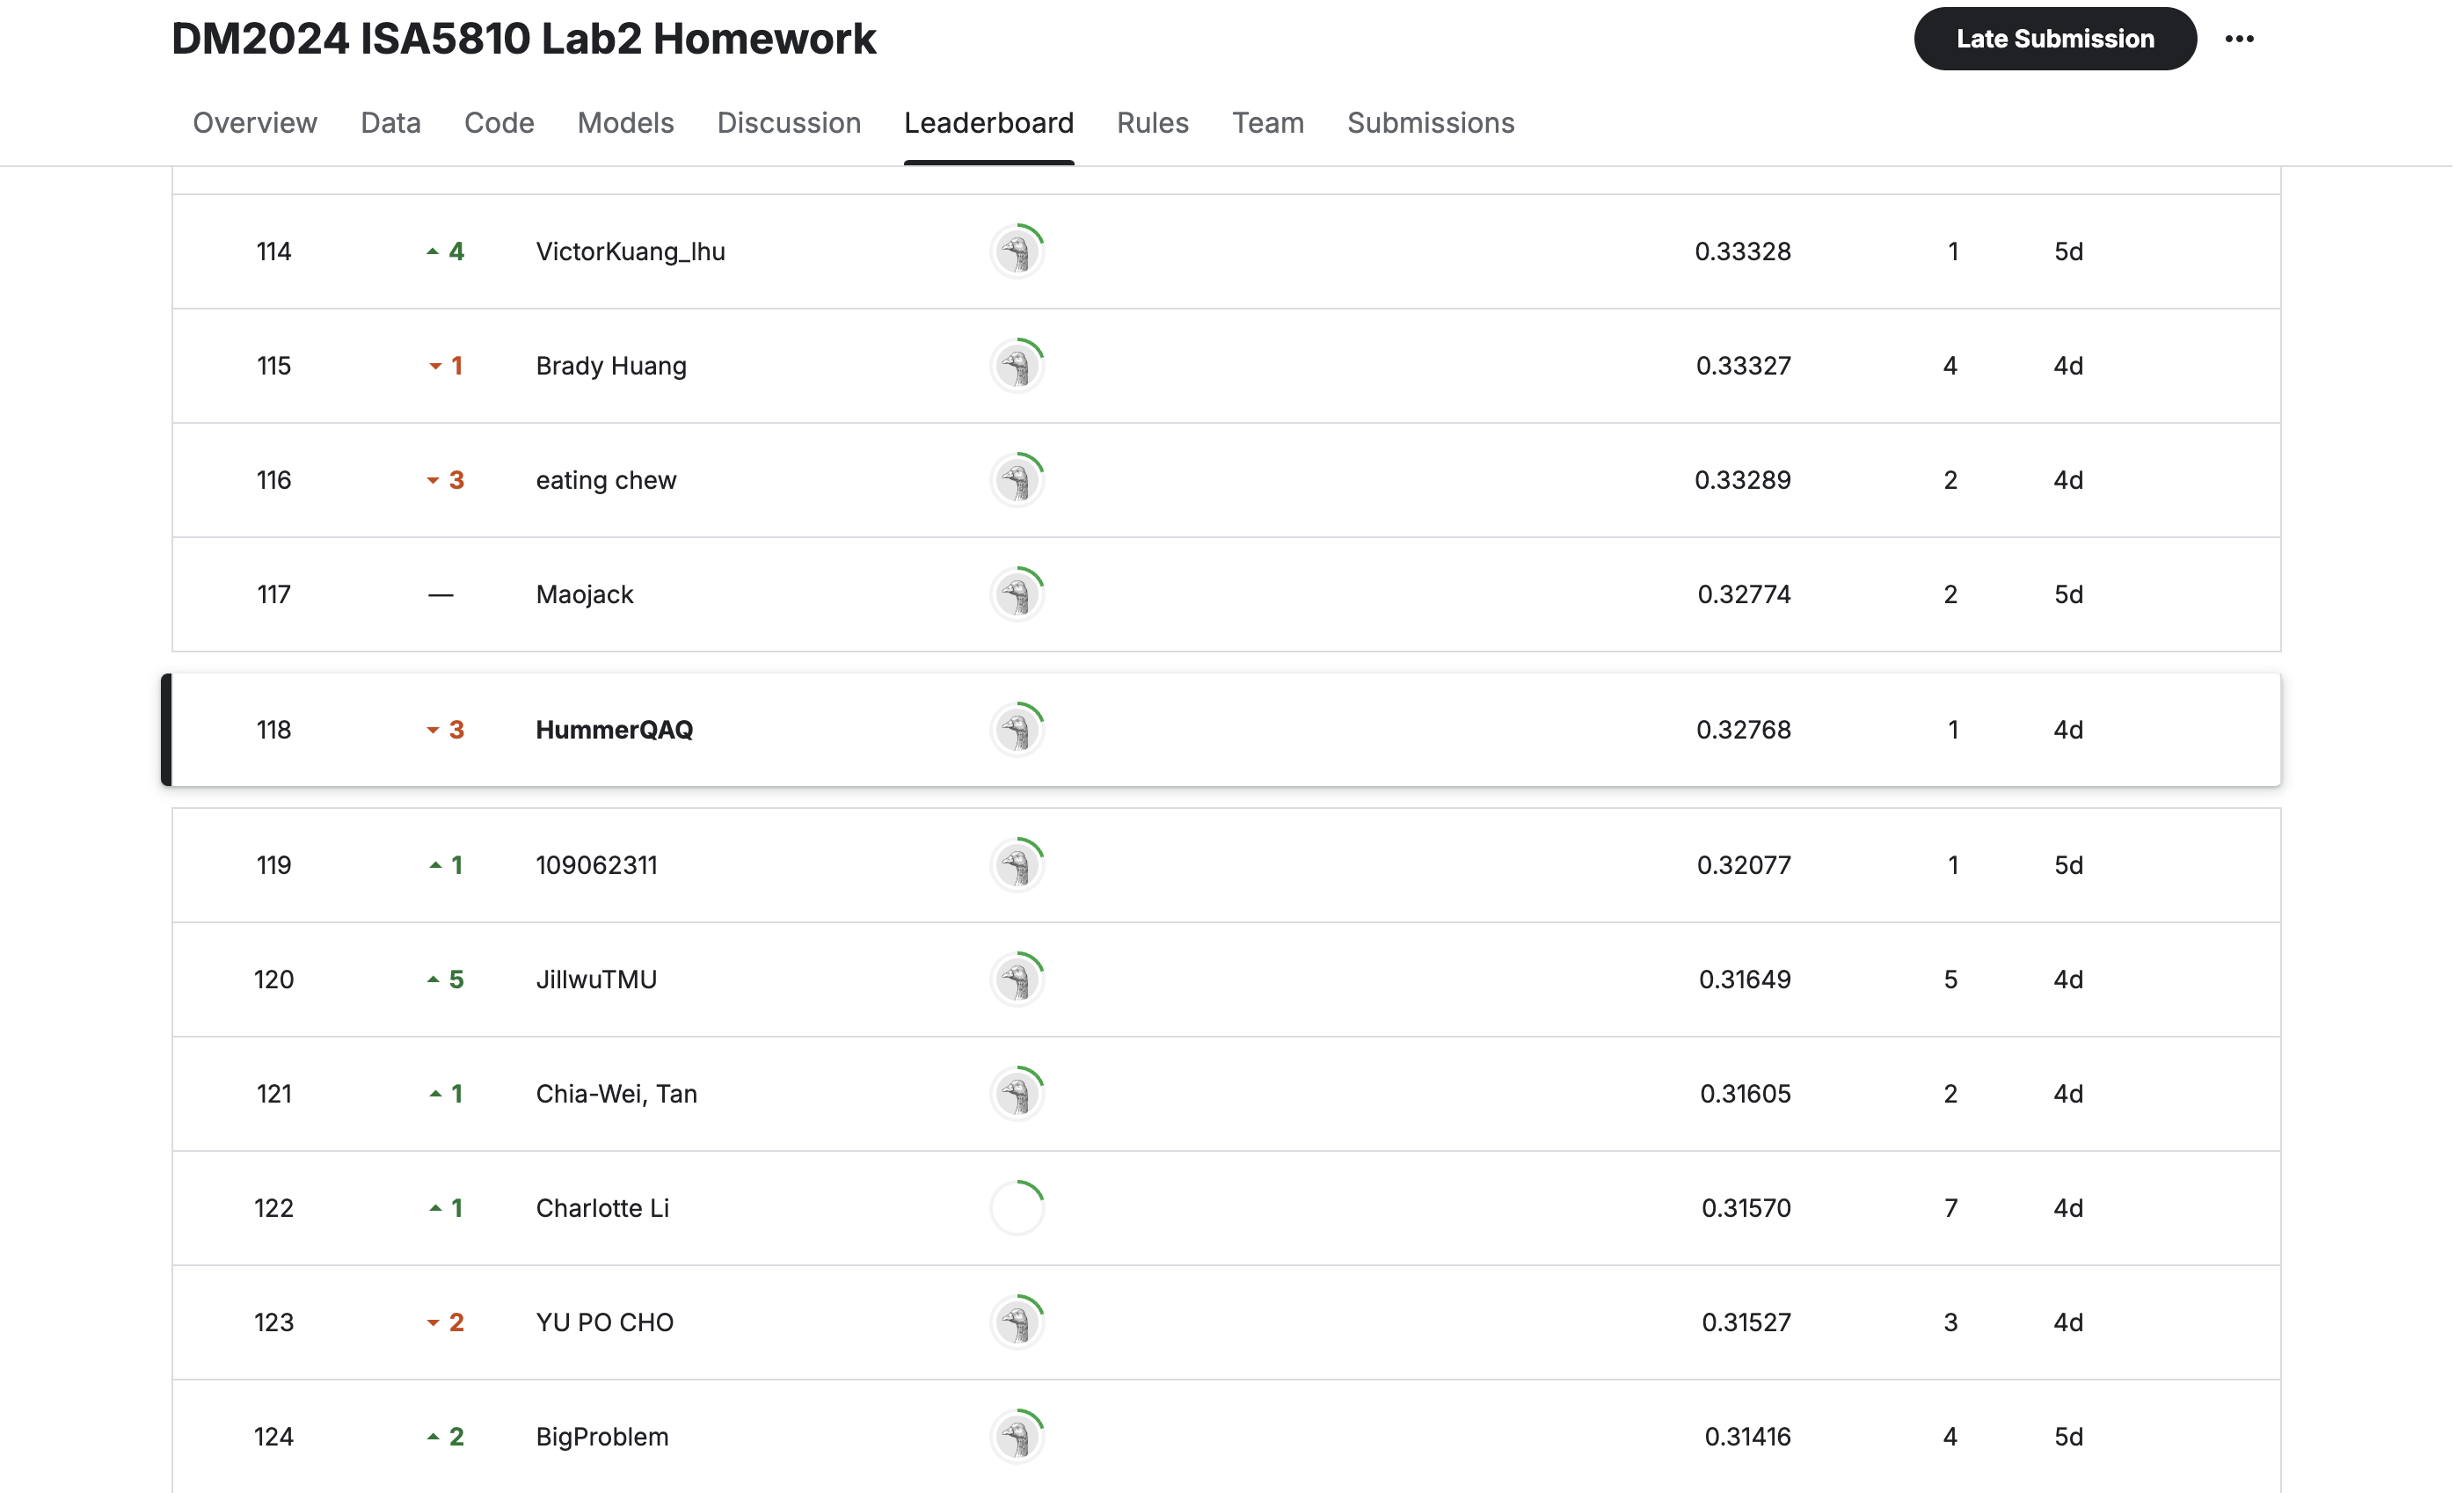

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__.

In [3]:
### Begin Assignment Here

#First Part : Lab2 - Master (文字部分多用中文寫作)
---

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

didiersalazar_lab2_dataset_path = kagglehub.dataset_download('didiersalazar/lab2-dataset')
didiersalazar_pictures_path = kagglehub.dataset_download('didiersalazar/pictures')
didiersalazar_google_news_vectors_path = kagglehub.dataset_download('didiersalazar/google-news-vectors')

print('Data source import complete.')


In [ ]:
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
#!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
!pip3 install keras --upgrade

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

In [ ]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

In [ ]:
#Download model llama 3.2:1b
!ollama pull llama3.2:1b

In [ ]:
#Download model llama 3.2
!ollama pull llama3.2

In [ ]:
#Download model llava-phi3
!ollama pull llava-phi3

In [10]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import umap
import gensim
import tensorflow
import keras
import ollama
import langchain
import langchain_community
import langchain_core
import bs4
import chromadb
import gradio

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.17.0
keras: 3.7.0


In [11]:
import pandas as pd

### training data
anger_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [12]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [13]:
### testing data
anger_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [14]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [15]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


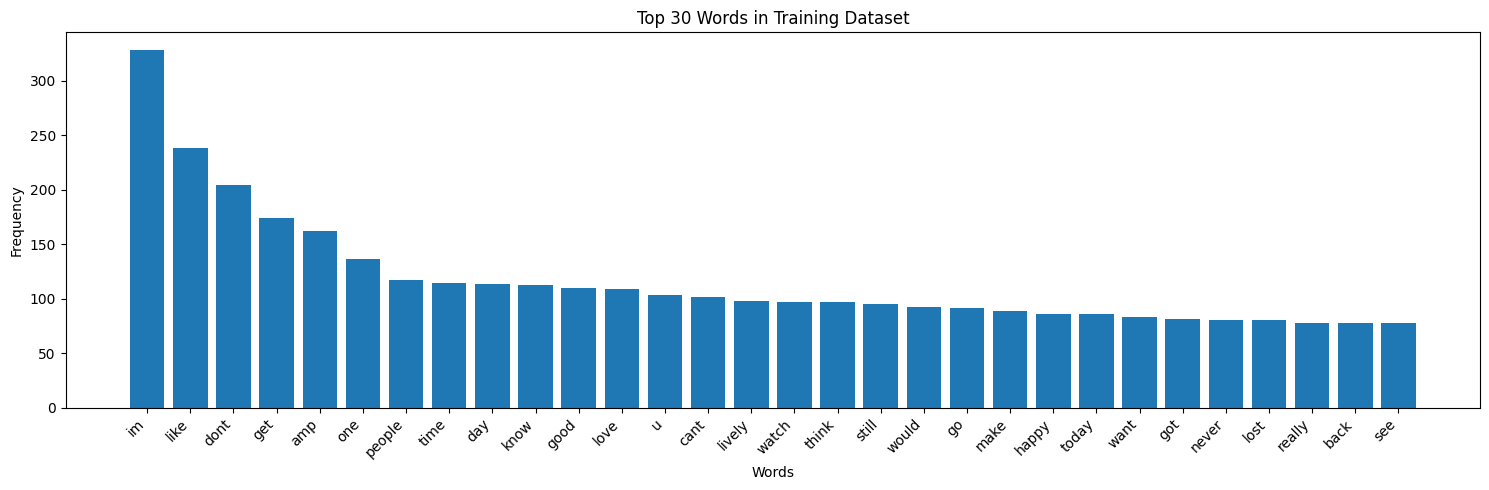

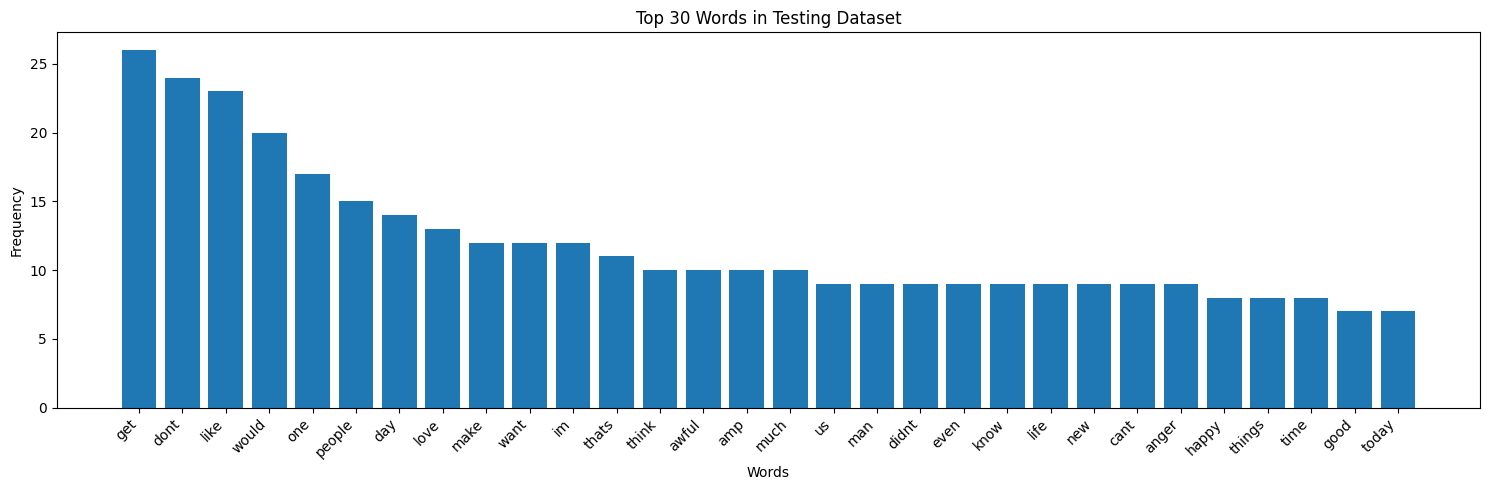

In [117]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import string

nltk.download('stopwords')

def preprocess_text(text):
    # 轉小寫
    text = text.lower()
    # 移除標點符號
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 分詞
    words = text.split()
    # 移除停用詞
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return words

def plot_word_frequencies(df, title):
    all_words = []
    for text in df['text']:
        all_words.extend(preprocess_text(text))

    # 詞頻
    word_freq = Counter(all_words).most_common(30)
    words, frequencies = zip(*word_freq)

    # 圖表
    plt.figure(figsize=(15, 5))
    plt.bar(range(len(words)), frequencies)
    plt.xticks(range(len(words)), words, rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 訓練集的圖
plot_word_frequencies(train_df, 'Top 30 Words in Training Dataset')

# 測試集的圖
plot_word_frequencies(test_df, 'Top 30 Words in Testing Dataset')

In [18]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [19]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [20]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


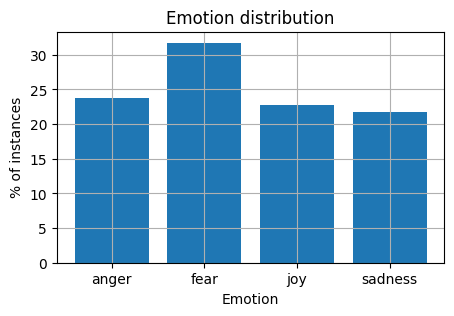

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [24]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [25]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [26]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [27]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [29]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [30]:
"😂" in feature_names

False

In [31]:
import nltk
nltk.download('punkt_tab')
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [32]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 2, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [34]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [35]:
# Answer here
# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt_tab')

# Create TF-IDF
TFIDF_1000 = TfidfVectorizer(
    max_features=1000,
    tokenizer=nltk.word_tokenize
)

# Apply vectorizer to training data
train_data_TFIDF_features_1000 = TFIDF_1000.fit_transform(train_df['text'])

# Check dimension
print("Shape of TF-IDF features:", train_data_TFIDF_features_1000.shape)

# Show some feature names
feature_names_1000 = TFIDF_1000.get_feature_names_out()
print("\nSample feature names (index 100-110):")
print(feature_names_1000[100:110])

# Convert to array to see some values
print("\nSample of the TF-IDF matrix:")
print(train_data_TFIDF_features_1000.toarray()[:5, :10])
print("\nIs '😄' in features?:", '😄' in feature_names_1000)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Shape of TF-IDF features: (3613, 1000)

Sample feature names (index 100-110):
['attacks' 'awareness' 'away' 'awe' 'awesome' 'awful' 'b' 'baby' 'back'
 'bad']

Sample of the TF-IDF matrix:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.2076206  0.12851598 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.22188139 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.56314358 0.         0.         0.         0.
  0.         0.         0.         0.        ]]

Is '😄' in features?: False


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [37]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'fear', 'sadness', 'fear', 'fear', 'joy', 'sadness', 'fear',
       'fear', 'joy'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [38]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [39]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [40]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [41]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

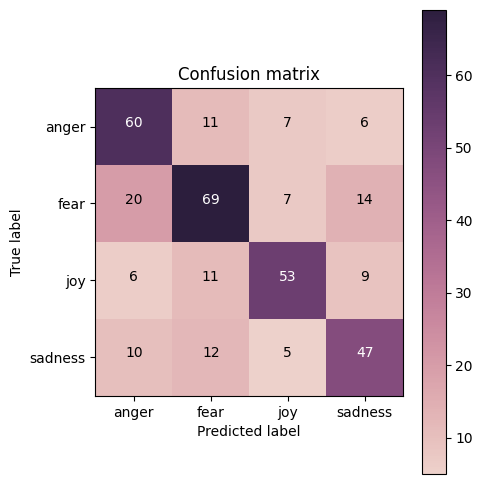

In [42]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [43]:
# Answer here


## 模型表現

- **訓練準確率**：99%（0.99）
- **測試準確率**：66%（0.66）

模型可能過擬合問題，因為訓練集表現遠高於測試集。

---

## 各類別的表現

| 情緒類別 | 精確率 |
|----------|--------|
| Joy | **0.74** |
| Fear | 0.67 |
| Anger  | 0.62 |
| Sadness | 0.62 |

Joy 表現最好，其次是 Fear，Anger 和 Sadness 的精確率表現相同。

---

## 矩陣分析

### 對角線數值即正確預測數量
- **Anger**：60 次正確
- **Fear**：69 次正確
- **Joy**：53 次正確
- **Sadness**：47 次正確

### 錯誤
- **Fear 常被誤判為 Anger**：20 次
- **Fear 常被誤判為 Sadness**：14 次
- **Anger 和 Fear 之間有較多混淆**


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Training accuracy: 0.86
Testing accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

       anger       0.83      0.71      0.77        84
        fear       0.65      0.92      0.76       110
         joy       0.85      0.72      0.78        79
     sadness       0.85      0.59      0.70        74

    accuracy                           0.76       347
   macro avg       0.79      0.74      0.75       347
weighted avg       0.78      0.76      0.75       347



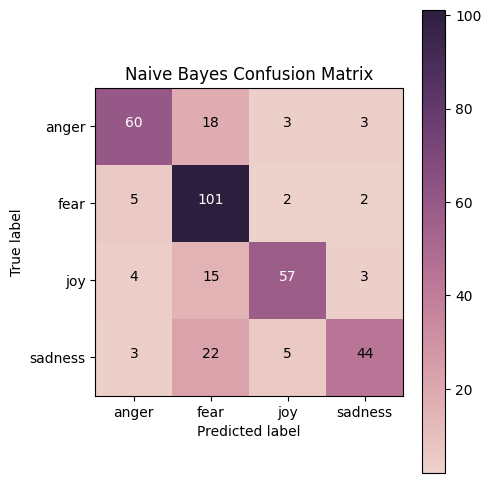

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TF-IDF
# 使用 transform，確保使用的特徵和訓練資料一樣
test_data_TFIDF_features_1000 = TFIDF_1000.transform(test_df['text'])

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(train_data_TFIDF_features_1000, train_df['emotion'])

# 預測
nb_train_pred = nb_model.predict(train_data_TFIDF_features_1000)
nb_test_pred = nb_model.predict(test_data_TFIDF_features_1000)

# 計算準確率
print("Training accuracy: {:.2f}".format(accuracy_score(train_df['emotion'], nb_train_pred)))
print("Testing accuracy: {:.2f}".format(accuracy_score(test_df['emotion'], nb_test_pred)))

# 打印分類結果
print("\nClassification Report:")
print(classification_report(test_df['emotion'], nb_test_pred))

# 繪製矩陣
cm_nb = confusion_matrix(test_df['emotion'], nb_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_nb, classes=my_tags, title='Naive Bayes Confusion Matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [45]:
# Answer here

## 模型比較

### 準確率比較

| 模型          | 訓練集準確率 | 測試集準確率 |
|---------------|------------|------------|
| Decision Tree | 0.99 (99%) | 0.66 (66%) |
| Naive Bayes   | 0.86 (86%) | 0.76 (76%) |

- **模型穩定性分析**：
  - Decision Tree 明顯的過擬合：訓練和測試集差距達 33%。
  - Naive Bayes 較穩定，無明顯過擬和，差距僅 10%。
  - Naive Bayes 的測試集表現更好（76% > 66%）。

### 各類別表現比較

| 模型          | 精確率範圍  | 召回率範圍  |
|---------------|-------------|-------------|
| Decision Tree | 0.62 - 0.74 | 0.63 - 0.71 |
| Naive Bayes   | 0.65 - 0.85 | 0.59 - 0.92 |

- 特別是 Naive Bayes 在 Fear 類別的召回率達到 **0.92**。

### 混淆矩陣比較

- **Decision Tree 的關鍵問題**：
  - Fear 經常被誤判為 Anger（20 次）和 Sadness（14 次）。

- **Naive Bayes如何改進**：
  - Fear 的分類準確度大幅提升（101 次正確）。
  - Sadness 被誤判為 Fear 的情況仍然存在（22 次）。

---

## 解釋

### Naive Bayes 表現更好的原因

1. **文本分類特性**：
   - Naive Bayes 假設特徵獨立，適合處理高維度但結構簡單的文本數據。

2. **機率模型**：
   - Naive Bayes 能更好處理文本中的字詞分佈的不確定性。

3. **較少過擬合**：
   - 基於簡單的統計機率計算，不容易過度擬合數據。

4. **計算速度快**
   - Naive Bayes 模型原理簡單直觀，運行速度和解釋力較高於其他機器學習模型

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic1.png?raw=true)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [46]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [47]:
import keras

In [48]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [49]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3237    sadness
518       anger
464       anger
2423        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [50]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic2.png?raw=true)

In [118]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_2 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

### 6.5 Predict on testing data

In [53]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(128, 500))
  warnings.warn(msg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 787ms/step


array([[2.3951677e-06, 3.2366817e-05, 9.9993920e-01, 2.6071317e-05],
       [6.7551497e-08, 9.9999857e-01, 1.7932794e-11, 1.3511255e-06],
       [1.2068023e-01, 2.6730301e-03, 7.9130940e-04, 8.7585545e-01],
       [6.4050779e-02, 4.2136805e-03, 9.2980367e-01, 1.9318498e-03],
       [3.6860257e-03, 9.9464309e-01, 8.8689649e-07, 1.6699580e-03]],
      dtype=float32)

In [54]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'sadness', 'joy', 'fear'], dtype=object)

In [55]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [56]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.374758,1.320242,0.463977,1.257390
1,1,0.649322,0.966178,0.654179,0.908122
2,2,0.798505,0.583312,0.697406,0.786904
3,3,0.846388,0.422587,0.708934,0.785421
4,4,0.876834,0.335811,0.697406,0.787545
5,5,0.904235,0.276401,0.691643,0.843956
6,6,0.920841,0.234719,0.700288,0.892730
7,7,0.937171,0.196197,0.694524,0.939729
8,8,0.950180,0.168981,0.688761,0.973216
9,9,0.955715,0.145624,0.680115,1.039607


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?!

<table><tr>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true" style="width: 300px;"/> </td>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true" style="width: 300px;"/> </td>
</tr></table>

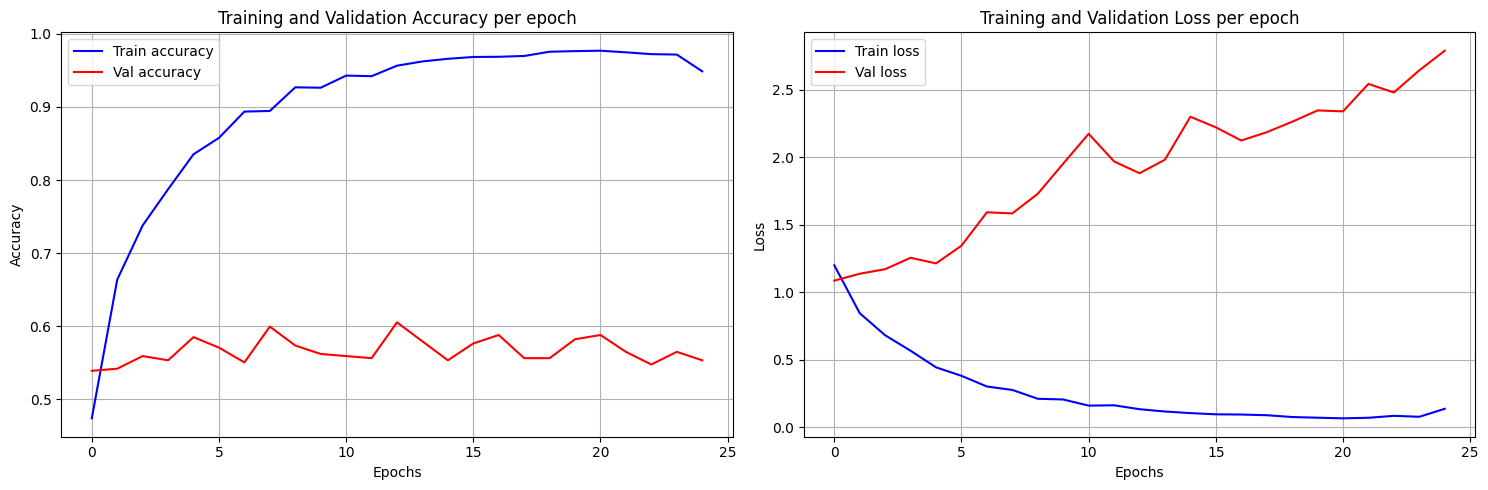

In [119]:
# Answer here
import matplotlib.pyplot as plt

# 提取訓練數據
epochs = training_log['epoch'].values
train_acc = training_log['accuracy'].values
val_acc = training_log['val_accuracy'].values
train_loss = training_log['loss'].values
val_loss = training_log['val_loss'].values

# 創建圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 繪製準確率圖
ax1.plot(epochs, train_acc, 'b-', label='Train accuracy')
ax1.plot(epochs, val_acc, 'r-', label='Val accuracy')
ax1.set_title('Training and Validation Accuracy per epoch')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# 繪製損失圖
ax2.plot(epochs, train_loss, 'b-', label='Train loss')
ax2.plot(epochs, val_loss, 'r-', label='Val loss')
ax2.set_title('Training and Validation Loss per epoch')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### 準確率圖分析（左圖）

#### 訓練準確率（藍）：

- 從約 40% 快速上升到 90%以上。
- 在第 5 個 epoch 後趨於平穩，最終達到 95%左右。

#### 驗證準確率（紅）：

- 初期與訓練準確率一起快速上升。
- 在約 70% 處達到高峰。
- 之後略有波動但基本上維持在 65-70% 之間。

### 損失函數圖分析（右圖）

#### 訓練損失（藍）：

- 從 1.3 快速下降。
- 持續下降至接近 0。

#### 驗證損失（紅）：

- 初期與訓練損失一起下降。
- 在第 5 個 epoch 後開始上升。
- 持續增加到約 1.6。

### 過擬合分析

- **明顯的過擬合**：
  - 訓練準確率持續上升，但驗證準確率停滯。
  - 訓練損失接近 0，但驗證損失持續增加。
  - 訓練和驗證指標的差距隨時間擴大。

---

## 如何處理過擬合

1. **運用訓練技術**：
   - 添加 Dropout 層。
   - 使用 L1/L2 正則化。

2. **減少模型複雜度**：
   - 減少隱藏層數量。
   - 減少神經元數量。

3. **早停**：
   - 在第 5-10 個 epoch 時停止訓練。


---

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [58]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3237,40410,@ReserveHinata tend to them he's going to get ...,"[@, ReserveHinata, tend, to, them, he, 's, goi..."
518,10518,Paul forever. Paul should have won! Paul playe...,"[Paul, forever, ., Paul, should, have, won, !,..."
464,10464,@DRUDGE_REPORT @FoxNews good thing the FBI did...,"[@, DRUDGE_REPORT, @, FoxNews, good, thing, th..."
2423,30419,@UKLittleKitchen Defo a hearty root veg gratin...,"[@, UKLittleKitchen, Defo, a, hearty, root, ve..."
1595,20738,#nobody #understand what #advocate mean if you...,"[#, nobody, #, understand, what, #, advocate, ..."


In [59]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'ReserveHinata', 'tend', 'to', 'them', 'he', "'s", 'going', 'to', 'get', 'infections', '.', '\\n\\nHe', "'s", 'frowning', 'and', 'looking', 'down', 'as', 'he', 'does', 'this', '.', '\\nIt', 'must', 'hurt', 'damn', '.', ']']),
       list(['Paul', 'forever', '.', 'Paul', 'should', 'have', 'won', '!', 'Paul', 'played', 'such', 'a', 'better', 'game', '!', '#', 'BB18', '#', 'angry']),
       list(['@', 'DRUDGE_REPORT', '@', 'FoxNews', 'good', 'thing', 'the', 'FBI', 'did', "n't", 'offend', 'them', '!'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [60]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [61]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.16266167,  0.5343566 , -0.07271532, -0.2909379 , -0.04013227,
       -1.5253993 ,  0.5330104 ,  1.1501213 , -0.28407925, -0.986292  ,
       -0.28635386, -0.6938105 , -0.80859727,  0.3773319 ,  0.03224398,
       -0.33932826,  0.24917942, -0.5843899 ,  0.42823336, -1.1070539 ,
        0.50452083,  0.9349458 ,  0.56849414,  0.6155837 ,  0.1890535 ,
        0.30871797, -0.5777732 ,  0.71699077, -0.6244817 ,  0.02343014,
        0.439027  , -0.5129064 ,  0.23724625, -0.5452841 , -0.5354301 ,
        0.01790767,  0.35910204,  0.01592566, -0.21774685, -0.5619219 ,
        0.28434741,  0.02119448, -0.5971561 , -0.10083769,  0.57809746,
        0.0657171 , -0.8328137 ,  0.6483294 ,  0.22967602,  0.60636616,
        0.09075218, -0.54064566,  0.15916708, -0.47805703, -0.24231414,
       -0.78325605,  0.30295947, -0.11620299, -0.4895779 ,  0.02351212,
       -0.16045581, -0.22475722,  0.41785187,  0.19655125, -0.53804517,
        0.7582468 ,  0.40168113,  0.4842001 , -0.9612348 ,  0.31

In [62]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9233955144882202),
 ('birthday', 0.9224234819412231),
 ('Be', 0.9111669659614563),
 ('bday', 0.9065123796463013),
 ("'be", 0.8965055346488953),
 ('smile', 0.8930589556694031),
 ('Makes', 0.8924826979637146),
 ('plz', 0.8918938636779785),
 ('cats', 0.8904671669006348),
 ('help', 0.8881229758262634)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [63]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = f"{didiersalazar_google_news_vectors_path}/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [64]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [66]:
# Answer here

In [67]:
#1. Mean/Average Word Embeddings

def sentence_to_vec(sentence, word2vec_model, vector_size=100):
    word_vectors = []
    for word in sentence:
        try:
            vector = word2vec_model.wv[word]
            word_vectors.append(vector)
        except KeyError:
            continue

    if word_vectors:
        # 計算所有詞向量的平均數
        sentence_vector = np.mean(word_vectors, axis=0)
        return sentence_vector
    else:
        return np.zeros(vector_size)

In [68]:
#2. TF-IDF Weighted Average
def sentence_to_weighted_vec(sentence, word2vec_model, tfidf_weights):
    vectors = []
    weights = []
    for word in sentence:
        try:
            vector = word2vec_model.wv[word]
            weight = tfidf_weights[word]
            vectors.append(vector)
            weights.append(weight)
        except KeyError:
            continue

    if vectors:
        weighted_vectors = [v * w for v, w in zip(vectors, weights)]
        return np.mean(weighted_vectors, axis=0)
    return np.zeros(vector_size)

In [69]:
#3. Sequential Representation
def create_sequence_vectors(sentences, word2vec_model, max_length):
    sequence_vectors = []
    for sentence in sentences:
        # 將句子轉換為固定長度的序列
        sequence = np.zeros((max_length, word2vec_model.vector_size))
        for i, word in enumerate(sentence[:max_length]):
            try:
                sequence[i] = word2vec_model.wv[word]
            except KeyError:
                continue
        sequence_vectors.append(sequence)
    return np.array(sequence_vectors)

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [70]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [71]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cae4c6b4670>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


In [122]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [123]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [124]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

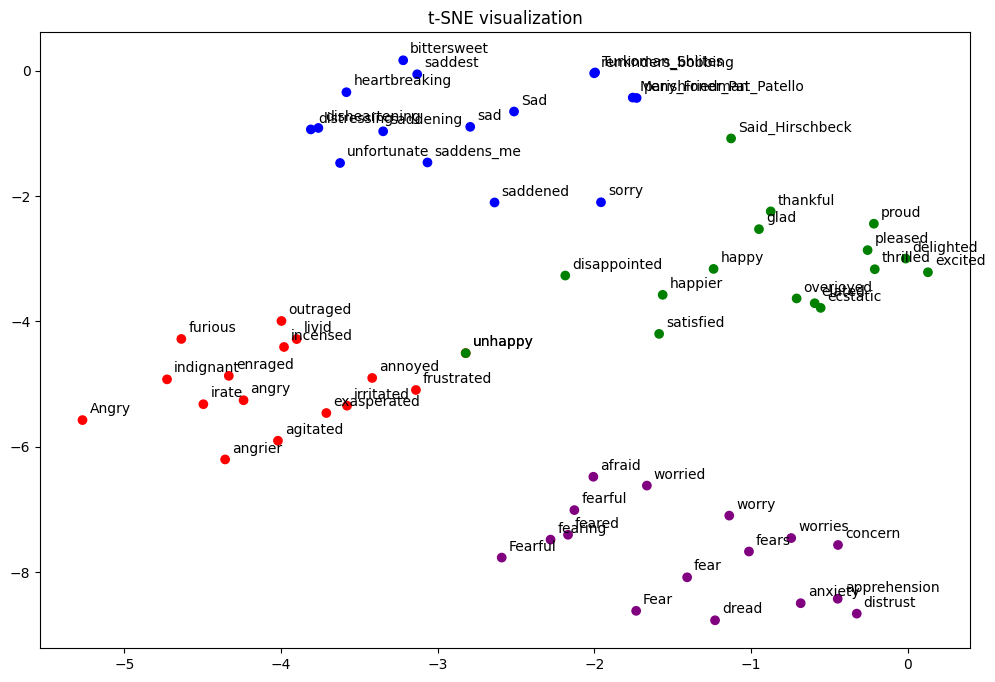

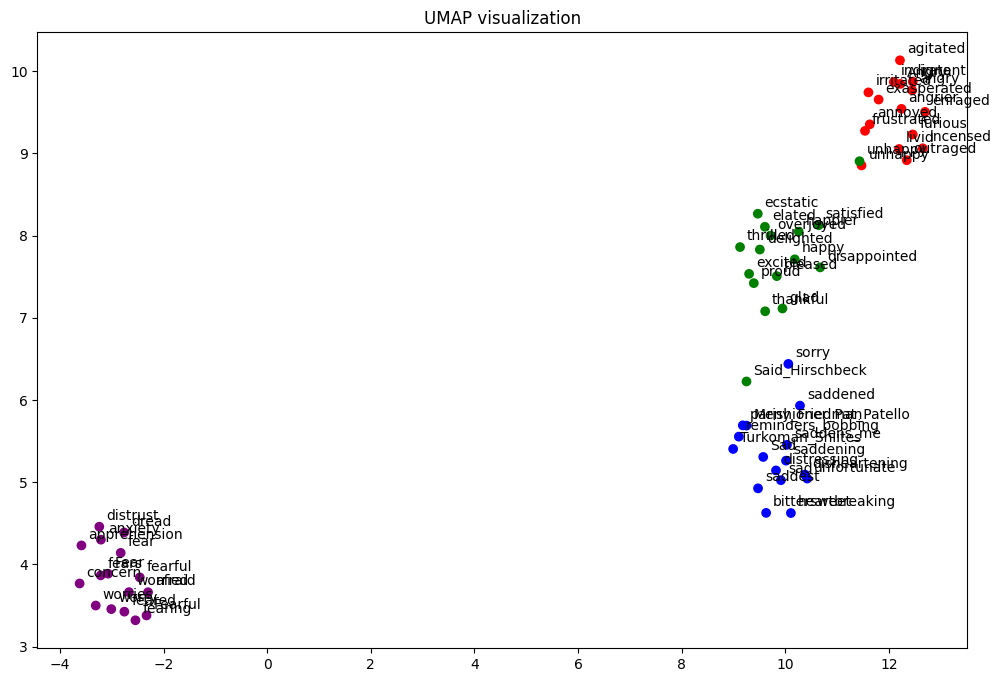

In [126]:
# Answer here
# 1. 詞列表
word_list = ['angry', 'happy', 'sad', 'fear']
topn = 15  # 各取15個最相關的詞

angry_words = ['angry'] + [word for word, sim in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word for word, sim in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word for word, sim in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word for word, sim in w2v_google_model.most_similar('fear', topn=topn)]

# 合併所有詞
target_words = angry_words + happy_words + sad_words + fear_words

colors = ['red'] * (topn + 1) + ['green'] * (topn + 1) + ['blue'] * (topn + 1) + ['purple'] * (topn + 1)

# t-SNE
def plot_tsne(target_words, colors, title="t-SNE visualization"):
    X = np.array([w2v_google_model[word] for word in target_words])

    # 降維
    tsne = TSNE(n_components=2, metric='cosine', random_state=28)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)

    for i, word in enumerate(target_words):
        plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]),
                    xytext=(5, 5), textcoords='offset points')

    plt.title(title)
    plt.show()

# UMAP
def plot_umap(target_words, colors, title="UMAP visualization"):
    X = np.array([w2v_google_model[word] for word in target_words])

    # 降維
    umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
    X_umap = umap_model.fit_transform(X)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors)

    for i, word in enumerate(target_words):
        plt.annotate(word, xy=(X_umap[i, 0], X_umap[i, 1]),
                    xytext=(5, 5), textcoords='offset points')

    plt.title(title)
    plt.show()

# 繪製兩種視覺化
plot_tsne(target_words, colors)
plot_umap(target_words, colors)

### t-SNE

- **群集分布**：
  - 四種情緒的群集比較鬆散。
  - **生氣**和**恐懼**的詞彙分布在底部。
  - **快樂**的詞彙分布在右側中部。
  - **悲傷**的詞彙分布在上方中部。

- **詞之間的關係**：
  - 展示了更細緻的詞彙間關係。
  - 詞義相近的詞彙會更靠近（如 angry 和 furious）。

- **視覺化**：
  - 分布較為分散。
  - 顯現了更多局部細節。
  - 空間分佈較為平均。

---

### UMAP

- **群集分布**：
  - 群集更加緊密和明確。
  - **生氣**的詞彙集中在右上角。
  - **快樂**的詞彙在中間偏上。
  - **悲傷**的詞彙在中間偏下。
  - **恐懼**的詞彙集中在左下角。

- **詞之間的關係**：
  - 更強調群組間的整體關係。
  - 群集之間的邊界更清晰。
  - 相似情緒的詞彙聚集得更緊湊。

- **視覺化**：
  - 分布更加集中。
  - 群集間的區分更明顯。
  - 結構比較容易觀察和理解。

In [78]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various statistical and computational techniques to extract useful information from raw data.

**Key Characteristics:**

*   **Large volumes of data**: Data mining operates on massive datasets, often in the terabytes or petabytes range.
*   **Pattern discovery**: The goal is to identify hidden patterns, relationships, and anomalies within the data.
*   **Insight generation**: Data mining aims to provide actionable insights that can inform business decisions or solve complex problems.

**Types of Data Mining:**

1.  **Supervised Learning**: The model learns from labeled data and predicts outcomes for new, unseen data.
2.  **Unsupervised Learning**: The model discovers patterns and relationships in unlabeled data.
3.  **Semi-Supervised Learning**: A combination of supervised and unsupervised learning techniques.

**Data Mining Techniques:**


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [79]:
# Answer here
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are a helpful teaching assistant specialized in statistics.'
    },
    {
        'role': 'user',
        'content': 'What is a p-value?'
    },
    {
        'role': 'assistant',
        'content': 'A p-value is a statistical measure that helps determine the significance of your results.'
    },
    {
        'role': 'user',
        'content': 'Can you give me a practical example?'
    }
])

###System Role
特點：

- 設定整個對話的基礎規則
- 定義模型的身份和行為模式
- 通常在對話開始時設定
- 不會直接顯示給用戶

可以用來設定：
- 專業領域（如：數據科學家）
- 回答風格（如：正式、幽默）
- 輸出格式（如：markdown、JSON）
- 語言偏好（如：繁體中文、英文）

---

###Assistant Role
特點：

- 記錄 AI 先前的回應
- 確保對話的前後連貫性
- 可以引用之前的回答

用於：

- 多輪對話
- 推進問題


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

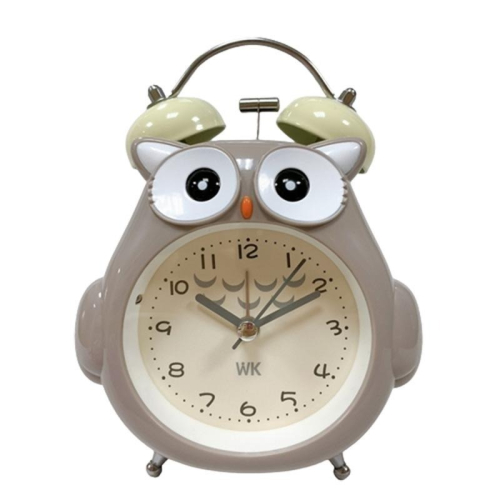

In [81]:
# Answer here
import ollama

response = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['/content/P3333204663524_1_43140429.jpg']
    }
])

print(response['message']['content'])

The image presents a charming scene of a light gray owl figurine standing upright on its two legs. The owl, with its large eyes and round head adorned with horns, exudes a sense of whimsy. Its beak is black, adding a touch of contrast to its overall appearance.

The owl's body is not just a decorative piece; it also serves as the base for a clock face that sits on top. The clock face is white and features black numbers from 1 through 12, indicating the time in a clear and concise manner. The word "WK" can be seen on the clock face, although its significance isn't immediately clear from the image alone.

The owl figurine, with its unique design and practical functionality as a clock, makes for an interesting piece of decor or perhaps a conversation starter. Its light gray color adds to the overall charm, making it a delightful addition to any setting.


整體來說，AI對圖片的形容是準確的，從整體的輪廓，到細部的耳朵、眉毛、時鐘刻度等等細節的詮釋都是準確的，就連色彩對比不明顯的米黃色都有正確的判斷。但是AI加入了對於圖片氛圍的詮釋，它提到懷舊感，這部分我認為有些過度詮釋

In [ ]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from IPython.display import Markdown, display

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [82]:
# Answer here
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader, TextLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from IPython.display import Markdown

llm_model = "llama3.2"

def load_and_retrieve_docs(sources, source_type="url"):
    all_docs = []

    for source in sources:
        if source_type == "url":
            loader = WebBaseLoader(web_paths=(source,), bs_kwargs=dict())
        else:
            loader = TextLoader(source)

        docs = loader.load()
        all_docs.extend(docs)

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=200
    )
    splits = text_splitter.split_documents(all_docs)

    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

    return vectorstore.as_retriever()

# 測試用的三個URL
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.ibm.com/topics/machine-learning",
    "https://www.ibm.com/topics/artificial-intelligence"
]

retriever = load_and_retrieve_docs(urls, "url")

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

def ollama_llm(question, context):
    formatted_prompt = f"""Based on the following context, please answer the question accurately and concisely.

Context: {context}

Question: {question}

Answer:"""

    response = ollama.chat(model='llama3.2', messages=[
        {
            'role': 'system',
            'content': 'You are a helpful assistant that answers questions based solely on the provided context. If the information cannot be found in the context, say so.'
        },
        {
            'role': 'user',
            'content': formatted_prompt
        }
    ])
    return response['message']['content']

def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# 問題
test_questions = [
    "What are the key differences between supervised and unsupervised learning in machine learning?",
    "How do large language models handle context and understanding?",
    "What are the main applications of artificial intelligence in business?"
]

print("=== Testing RAG System ===")
for i, question in enumerate(test_questions, 1):
    print(f"\nQuestion {i}: {question}")
    print("\nResponse:")
    result = rag_chain(question)
    display(Markdown(result))
    print("\n" + "="*50)


=== Testing RAG System ===

Question 1: What are the key differences between supervised and unsupervised learning in machine learning?

Response:


According to the context, there is no specific information about the differences between supervised and unsupervised learning. The text only explains that deep neural networks enable unsupervised learning by automating the extraction of features from large data sets, but it does not provide a detailed comparison between supervised and unsupervised learning.



Question 2: How do large language models handle context and understanding?

Response:


Large language models (LLMs) handle context and understanding through a combination of techniques. They learn to predict the next word in a sentence based on the context provided by the preceding words, using the following steps:

1. Tokenization: Text is broken down into smaller sequences of characters called tokens.
2. Embeddings: These tokens are transformed into numeric representations (embeddings) that capture the context of each word.
3. Attention mechanism: The model uses an attention mechanism to focus on specific parts of the data set, attributing a probability score to the recurrence of words.

By combining these steps, LLMs can infer from context, generate coherent and contextually relevant responses, and understand the nuances of human language.



Question 3: What are the main applications of artificial intelligence in business?

Response:


Unfortunately, I don't have enough context to answer your question about the main applications of artificial intelligence in business. The provided text only discusses examples of machine learning and LLMs, but does not explicitly mention their applications in a business setting beyond customer service, natural language understanding, and natural language processing capabilities.

##Advantages

1. **Improved Contextual Relevance**

Retrieves relevant data before generating responses, ensuring factual accuracy and reducing hallucinations.

2. **Scalability**

Scales to handle large knowledge bases and requires less retraining for new use cases.

3. **Flexibility**

Easily adapts to different domains by updating retrieval databases, enabling rapid deployment.

4. **Enhanced Interpretability**

Provides a transparent link to sources, improving traceability and user trust in critical fields.

5. **Efficiency in Handling Knowledge Updates**

Dynamically retrieves updated data, making it suitable for tasks needing up-to-date knowledge.

##Disadvantages

1. **Dependency on Retrieval Quality**

Relies on retrieved document quality; poor results lead to irrelevant or incorrect responses.

2. **Complexity and Resource Requirements**

Combining components adds complexity and requires significant computational resources.

3. **Limited Generalization**

Restricted by predefined knowledge bases, limiting accuracy if required data is unavailable.


4. **Potential for Bias**

Retrieved data may contain biases that propagate into responses.

In [83]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [84]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [85]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_train #We can see the new column with the embeddings

In [ ]:
df_test #We can see the new column with the embeddings

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [89]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [90]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.45821325648414984


In [91]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.40      0.44      0.42        84
        fear       0.54      0.54      0.54       110
         joy       0.42      0.44      0.43        79
     sadness       0.46      0.38      0.41        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



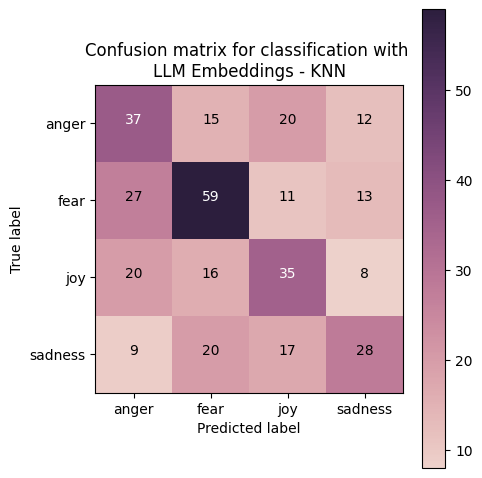

In [92]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

In [93]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [94]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [95]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [96]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [97]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [98]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [ ]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

In [101]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step


array([[1.17931922e-08, 5.80563301e-06, 9.99984384e-01, 9.79611377e-06],
       [5.99179506e-13, 1.00000000e+00, 1.90859266e-15, 1.27160744e-08],
       [7.27311336e-11, 1.85411170e-06, 9.99998093e-01, 1.02859794e-07],
       [8.45786999e-04, 5.52960919e-05, 2.14480069e-02, 9.77650940e-01],
       [7.39551524e-06, 9.99974608e-01, 1.45227375e-07, 1.78257997e-05]],
      dtype=float32)

In [102]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'joy', 'sadness', 'fear'], dtype=object)

In [103]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.55


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log_2.csv")
training_log

In [ ]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

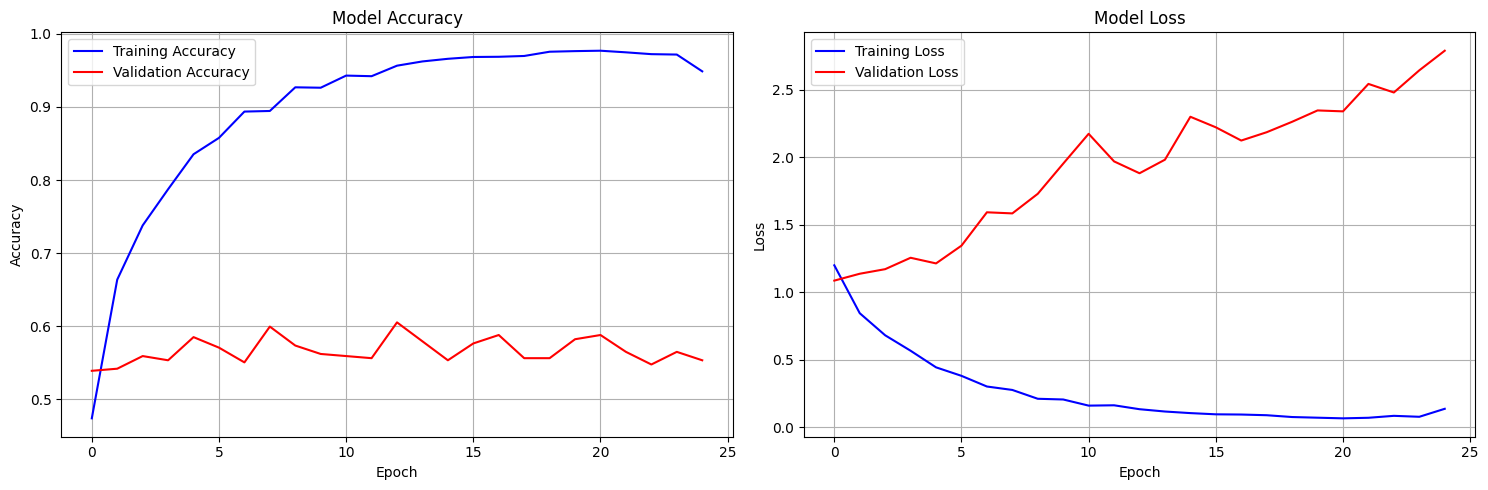

In [107]:
# Answer here
import matplotlib.pyplot as plt

training_log = pd.read_csv("training_log_2.csv")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 準確率圖
ax1.plot(training_log['epoch'], training_log['accuracy'], 'b-', label='Training Accuracy')
ax1.plot(training_log['epoch'], training_log['val_accuracy'], 'r-', label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# 損失圖
ax2.plot(training_log['epoch'], training_log['loss'], 'b-', label='Training Loss')
ax2.plot(training_log['epoch'], training_log['val_loss'], 'r-', label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### 準確率圖

- **訓練準確率**：從 45% 快速上升到 95% 以上。
- **驗證準確率**：維持在 55-60% 左右。
- **差距**：訓練和驗證準確率差距大（約 35%）。
- **現象**：過擬合。

### 損失函數圖

- **訓練損失**：持續下降接近 0。
- **驗證損失**：持續上升到 2.5 以上。
- **分析**：val loss的上升趨勢顯示過擬合嚴重。

---

## 模型比較

### KNN

- **準確率**：46%
- **優點**：實現簡單，不易過擬合。
- **缺點**：效果一般，模型的泛化能力有限。

### NN

- **準確率**：56%
- **優點**：能學習更複雜的特徵關係。
- **缺點**：過擬合，泛化性能不佳。

---

## LLM Embeddings 的影響

### 優點

- 提供了更豐富的字詞語意信息。
- 對數據做初步的降維（文本 -> 向量）
- 捕捉了詞語間複雜語意與上下文關係

### 限制

- 特徵的維度過高可能導致過擬合。


### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [112]:
# Answer here

## 比較三種的結果

### Zero-shot

- **準確率**：52.50%
- **特點**：
  - Joy 類別表現最佳（F1=0.67）。
  - Fear 類別表現最差（F1=0.17）。

- **矩陣分析**：
  - Joy 預測準確率高（17/20）。
  - Fear 經常被誤判為 Anger（12/20）。
  - Sadness 的預測較為波動。

---

### One-shot

- **準確率**：46.25%
- **特點**：
  - Anger 召回率最高（0.95）。
  - Fear 表現極差（F1=0.09）。

- **矩陣分析**：
  - 51 個樣本被預測為 Anger。
  - Sadness 和 Fear 幾乎無法正確識別。

---

### Five-shot

- **準確率**：50.00%
- **特點**：
  - Joy 和 Anger 表現較好（F1 分別為 0.70 和 0.52）。
  - 預測表現較為平衡。

- **混淆矩陣分析**：
  - Joy 和 Anger 的識別率提高（相對於one-shot）
  - Fear 和 Sadness 仍然混淆。

---

## 比較分析

- Zero-shot 表現最好。
- 增加範例並未顯著提升性能。
- Five-shot 比 One-shot 表現略好。

### 各情緒類別表現

- **Joy**：在所有設定下都表現都不錯。
- **Fear**：普遍表現最差。
- **Anger**：shot增加有助於提高這部分的準確性。
- **Sadness**：波動較大，表現普通。

### 詮釋

####Zero-shot 表現最好 (52.50%) 的原因：

- LLM預訓練時已經學習到大量的情緒相關的模式
- 簡單的指令反而減少了雜訊
- 這個LLM 本身對情緒的理解就不差


#### One-shot (46.25%) 表現下降的可能原因：

- 只有一個範例可能過擬合
- 模型過度依賴這個唯一的範例，如果這個範例有些偏差，模型的表現可能因此不佳


---

# Third Part - Competition Report
### Also subnit PDF in github

##1st Try - TF-IDF + Random Forest
score: 0.32768

I try this method in the formal competition, but it didn't get a good performance.However, due to the time pressure, I submited it as my result.

 After the competition ended, I try another method and I although write it below.

In [113]:
import json
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Read data

In [114]:
def load_json_data(file_path):
    tweets = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            tweet = json.loads(line)
            source = tweet['_source']['tweet']
            tweets.append({
                'tweet_id': source['tweet_id'],
                'hashtags': source['hashtags'],
                'text': source['text']
            })
    return pd.DataFrame(tweets)

### Data Prreprocessing

In [115]:
def preprocess_text(text):
    # 移除URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # 移除@mentions
    text = re.sub(r'@\w+', '', text)
    # 移除數字
    text = re.sub(r'\d+', '', text)
    # 轉換為小寫
    text = text.lower()
    # 移除標點符號
    text = re.sub(r'[^\w\s]', '', text)
    # 移除多餘空格
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
df = load_json_data('/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json')
emotion_df = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/emotion.csv')
identification_df = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/data_identification.csv')

In [ ]:
df = df.merge(identification_df, on='tweet_id', how='left')
train_df = df[df['identification'] == 'train'].merge(emotion_df, on='tweet_id', how='left')
test_df = df[df['identification'] == 'test']

train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

###TF-IDF
- max_features=4000：實驗後發現這個數量能在特徵數和效率間取得平衡
- min_df=2：避免過於罕見的詞
- max_df=0.95：過濾掉嚴重的常用詞
- ngram_range=(1,3)：捕捉最多3個詞的詞組，希望可以抓住更多情緒表達方式

In [ ]:
tfidf = TfidfVectorizer(
    max_features=4000,  # 增加特徵數
    min_df=2,          # 最小文檔頻率
    max_df=0.95,       # 最大文檔頻率
    stop_words=stopwords.words('english'),
    ngram_range=(1, 3)  # 加入trigrams
)

### Training Set & Testing Set

In [ ]:
X = vectorizer.fit_transform(train_df['processed_text'])
y = train_df['emotion']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25,
    random_state=42,
    stratify=y
)

###Random Forest
- n_estimators=200：增加樹的數量提高穩定性
- max_depth=15：限制樹數，避免過擬合
- min_samples_split和min_samples_leaf：較小的值讓模型學習細節
- class_weight='balanced'：處理類別不平衡問題

In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

In [ ]:
rf_classifier.fit(X_train, y_train)

###Prediction, Validation
- 暫時以f1-score作為評估指標

In [ ]:
val_pred = rf_classifier.predict(X_val)
print("Validation F1-score:", f1_score(y_val, val_pred, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_val, val_pred))

# 特徵重要性分析
feature_names = tfidf.get_feature_names_out()
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# 測試集預測
X_test = tfidf.transform(test_df['processed_text'])
test_predictions = rf_classifier.predict(X_test)


In [ ]:
submission = pd.DataFrame({
    'id': test_df['tweet_id'],
    'emotion': test_predictions
})

submission.to_csv('/kaggle/working/submission.csv', index=False)

---

##2nd try - BERT

Score : 0.46939

## Preprocessing

In [ ]:
import json
import pandas as pd
import numpy as np
import torch
from torch import nn
from transformers import AutoTokenizer, AutoModel, AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import re

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

##Define Dataset

In [ ]:
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx] if self.labels is not None else None

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label) if label is not None else None
        }

##Modeling

In [ ]:
class EmotionClassifier(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.bert = AutoModel.from_pretrained('distilbert-base-uncased')
        self.drop = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        pooled_output = outputs[0][:, 0]  # 使用[CLS]標記的輸出
        output = self.drop(pooled_output)
        return self.fc(output)

In [ ]:
def load_json_data(file_path):
    tweets = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            tweet = json.loads(line)
            source = tweet['_source']['tweet']
            tweets.append({
                'tweet_id': source['tweet_id'],
                'text': source['text']
            })
    return pd.DataFrame(tweets)

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=3):
    best_val_loss = float('inf')

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0

        for batch in tqdm(train_loader, desc=f'Training Epoch {epoch+1}'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        model.eval()
        total_val_loss = 0
        val_preds = []
        val_labels = []

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

                val_preds.extend(outputs.argmax(dim=1).cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        avg_train_loss = total_train_loss / len(train_loader)
        avg_val_loss = total_val_loss / len(val_loader)

        print(f'Epoch {epoch+1}:')
        print(f'Average Training Loss: {avg_train_loss:.4f}')
        print(f'Average Validation Loss: {avg_val_loss:.4f}')

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model.pt')

##Main

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 讀取
df = load_json_data('/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json')
emotion_df = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/emotion.csv')
identification_df = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/data_identification.csv')

df = df.merge(identification_df, on='tweet_id', how='left')
train_df = df[df['identification'] == 'train'].merge(emotion_df, on='tweet_id', how='left')
test_df = df[df['identification'] == 'test']

# 預處理
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

# 編碼
label_encoder = LabelEncoder()
train_df['encoded_emotion'] = label_encoder.fit_transform(train_df['emotion'])

# 初始化tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# 分割訓練和驗證集
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_df['processed_text'].values,
    train_df['encoded_emotion'].values,
    test_size=0.2,
    random_state=42,
    stratify=train_df['encoded_emotion']
)

train_dataset = EmotionDataset(train_texts, train_labels, tokenizer)
val_dataset = EmotionDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# 模型
model = EmotionClassifier(n_classes=len(label_encoder.classes_))
model = model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# 訓練模型
train_model(model, train_loader, val_loader, criterion, optimizer, device)

# 準備測試集預測
test_dataset = EmotionDataset(
    test_df['processed_text'].values,
    [0] * len(test_df),
    tokenizer
)
test_loader = DataLoader(test_dataset, batch_size=32)

# 預測
model.eval()
predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask)
        preds = outputs.argmax(dim=1).cpu().numpy()
        predictions.extend(preds)

# 轉換預測結果
predicted_emotions = label_encoder.inverse_transform(predictions)

# 提交文件
submission = pd.DataFrame({
    'id': test_df['tweet_id'],
    'emotion': predicted_emotions
})
submission.to_csv('/kaggle/working/submission.csv', index=False)